In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Loading the Boston House Pricing Dataset    

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
housing.data.shape

(20640, 8)

In [6]:
housing.target.shape

(20640,)

In [7]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
dataset = pd.DataFrame(housing.data, columns=housing.feature_names)

In [9]:
dataset.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5919,2.5147,38.0,4.000000,1.055363,1359.0,4.702422,34.28,-118.44
6958,3.9243,34.0,5.601344,1.026876,2597.0,2.908175,34.00,-118.06
11807,3.0321,21.0,4.731083,1.013970,1847.0,2.150175,38.92,-121.10
10877,3.9844,38.0,5.403042,1.140684,1236.0,4.699620,33.72,-117.88
14114,3.2422,33.0,4.672199,1.107884,621.0,2.576763,32.74,-117.11


In [10]:
dataset['Price'] = housing.target

In [11]:
dataset.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
10187,2.0227,22.0,4.837838,1.131757,746.0,2.520270,33.87,-117.95,0.550
6610,5.8940,47.0,6.005540,0.975069,902.0,2.498615,34.18,-118.10,3.009
19521,1.8162,50.0,3.502564,0.969231,459.0,2.353846,37.64,-120.99,0.700
1697,6.2073,5.0,7.184633,1.041284,3326.0,3.814220,38.00,-122.26,2.729
14148,3.6125,36.0,4.969957,0.935622,619.0,2.656652,32.73,-117.08,1.225


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Summarizing the stats

In [13]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Checking missing values

In [14]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [15]:
dataset = dataset.drop(['Latitude','Longitude'],axis=1)

In [16]:
### Exploratory Data Analysis

## Correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,-0.023737
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,1.000000


In [33]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


In [17]:
# import seaborn as sns
# sns.pairplot(dataset)

Text(0, 0.5, 'House Prices')

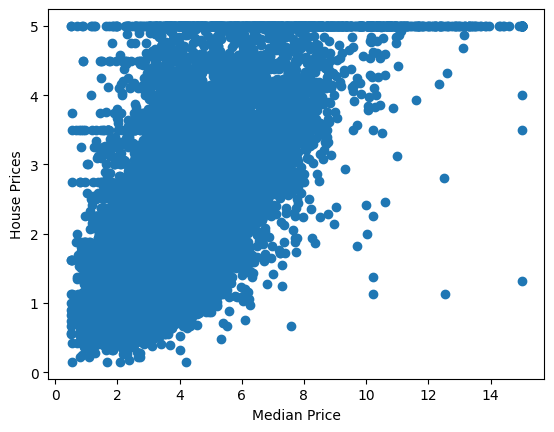

In [18]:
plt.scatter(dataset['MedInc'], dataset['Price'])
plt.xlabel("Median Price")
plt.ylabel("House Prices")

In [19]:
### Independent and Dependent Features

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [20]:
### Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=12)

In [21]:
### Standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [23]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [24]:
regression.fit(X_train, y_train)

LinearRegression()

In [25]:
### Print the coefficients and intercept
print(regression.coef_)

[ 1.01205399  0.21002278 -0.54321601  0.49932922  0.02775704 -0.05441454]


In [26]:
print(regression.intercept_)

2.0651751633444078


In [27]:
### Prediction with Test Data
reg_pred = regression.predict(X_test)

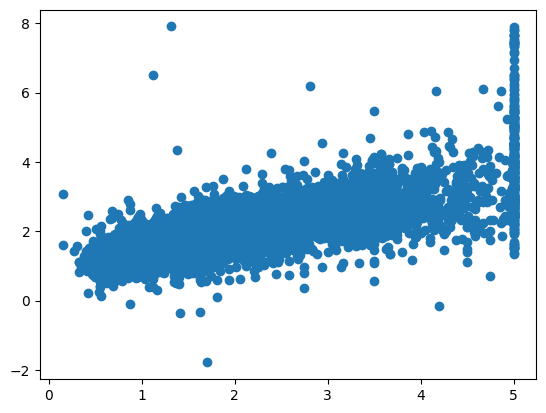

In [28]:
plt.scatter(y_test,reg_pred)

In [29]:
residuals = y_test-reg_pred

In [30]:
sns.displot(residuals, kind="kde")

NameError: name 'sns' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(f"Mean Squared error is: {mean_squared_error(y_test, reg_pred)}")
print(f"Mean absolute error is: {mean_absolute_error(y_test, reg_pred)}")

Mean Squared error is: 0.6149311935948768
Mean absolute error is: 0.5748497392223503


In [ ]:
import pickle
pickle.dump(regression, open('regressionmodel.pkl','wb'))

In [ ]:
pickled_model = pickle.load(open('regressionmodel.pkl','rb'))

In [ ]:
pickled_model.predict([[0.4,0.4,0.3,0.675,0.45,0.7]])

array([2.70248878])